In [1]:
# import pandas as pd
# from langdetect import detect

In [2]:
# reviewss = pd.read_csv("13127 tokopedia appstore summarization.csv", header=0, parse_dates=[0], index_col=0)

In [3]:
# reviews = reviewss['Original']

In [9]:
# def is_english(text):
#     try:
#         lang = detect(text)
#         return lang == 'id'
#     except:
#         return False

# count = 1
# # Loop through the Series and remove non-English strings
# for index, value in reviews.items():
#     if not is_english(value):
#         reviewss.drop(index, inplace=True)
        
#     if count%1000 == 0:
#         print(f'{count} Done')
#     count += 1

In [10]:
# len(reviews)

In [7]:
# reviews.to_csv("8.333 tokopedia appstore summarization.csv")

In [13]:
# reviewss = reviewss.apply(lambda x: x + "%%%")

In [14]:
# reviewss.to_csv('1000 Facebook Playstore English.csv')

In [3]:
# !pip install langdetect

In [1]:
import pandas as pd
from datetime import datetime
import string
import re

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import ImageColorGenerator
import numpy as np
from PIL import Image

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

df = pd.read_csv("Tokopedia_AppStore 13127 AppStore Indonesian.csv", header=0, parse_dates=[0], index_col=0, date_parser=parser)


In [2]:
df.head()

,review
date,
2023-05-31 23:58:56,Mantap
2023-05-31 23:58:22,Reliable apps for online shopping
2023-05-31 23:58:21,Nice
2023-05-31 23:50:09,good
2023-05-31 23:39:48,Cepet


In [3]:
reviews = df['review']

In [4]:
reviews.head()

date
2023-05-31 23:58:56                               Mantap
2023-05-31 23:58:22    Reliable apps for online shopping
2023-05-31 23:58:21                                 Nice
2023-05-31 23:50:09                                 good
2023-05-31 23:39:48                                Cepet
Name: review, dtype: object

In [5]:
reviews.tail()

date
2023-02-01 00:37:13    Edit Jan 2023. Ui/ux udah mantep sih, fitur jg...
2023-02-01 00:26:51    Saya mendukung toko pedia sebagai  marketplace...
2023-02-01 00:24:23    Sayang bgt ga bisa di upgrade ke ver terbaru k...
2023-02-01 00:16:54                            Lebih baik dari bukalapak
2023-02-01 00:04:16                          Aplikasi teringan dan keren
Name: review, dtype: object

In [6]:
len(reviews)

13127

In [7]:
all_reviews = ' '.join(reviews.astype(str).tolist())
all_reviews[:1000]

'Mantap Reliable apps for online shopping Nice good Cepet Easy access easy to use complete wt all you need trustworthy seller Aplikasi belanja tokopedia semakin mudah, belanja online makin menyenangkan Udah gak keitung berapa barang yang udah aku beli disini Great job Tokopedia team! mantap Very good Best platform olshop Gooood Puas... useful Situ jual beli online terbaik Keep it up Sangat Mudah2an dan praktis.Menolong sekali mantap tokped ui/uxnya enak di pandang hahahay Biaya admin mahal banget IDR2000 很好啦 Semoga amanah Dari beberapa marketplace paling suka belanja di tokped, tampilannya simple, ga norak & bnyk iklan Powerfull apps Apps toped semakin hari semakin baik, tingkatkan terus ⭐️⭐️⭐️⭐️⭐️⭐️⭐️ Awesome <3 The best’s apps for shop Usefull aps..makes your life better 😉 👍🏻👍🏻👍🏻👍🏻 ok Love UI n UX 5 star dulu lah, 👍🏻 great app Paling mudah digunakan, penjual banyak dan harga bersaing. This product is very coolll... tokonya mudah, murah & muantep punya qt semua Keren banget Sangat mem

In [8]:
# NLTK tokenization
words = word_tokenize(all_reviews)

# Remove symbols and emoticons
filtered_words = [re.sub(r'[^\w\s]', '', word) for word in words]

# Remove stopwords
nltk.download('stopwords')
stopwords_id = set(stopwords.words('indonesian'))
filtered_words = [word for word in filtered_words if word.lower() not in stopwords_id]

# manual_sw = ["yg","nya","gak","ga","ya","dr","tp","gk","aja","tokopedia","tokped","aplikasi"]
# filtered_words = [word for word in filtered_words if word.lower() not in manual_sw]
filtered_reviews2 = ' '.join(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
#Create the mask
masking = np.array(Image.open('Tokopedia.png'))

#Grab the mask colors
colors = ImageColorGenerator(masking)

In [10]:
# Generate the word cloud with additional parameters
wordcloud_rsw = WordCloud(
    width=3785,
    height=4267,
    mask=masking,
    background_color='black',
    color_func=colors,
    contour_color='green',
    contour_width=2,
    font_path='BauhausRegular.ttf',
    max_words=100,
    max_font_size=1000
).generate(filtered_reviews2)

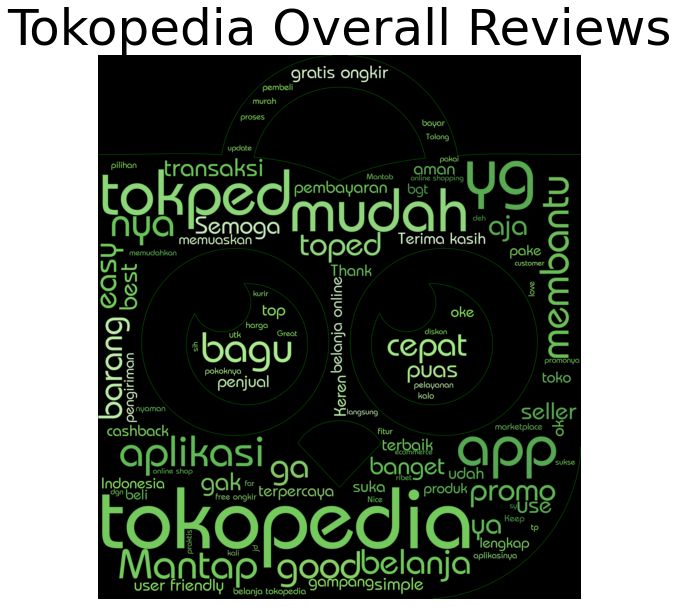

In [11]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_rsw, interpolation='bilinear')
plt.axis('off')
plt.title('Tokopedia Overall Reviews', fontsize=50, color='black')
plt.show()

In [12]:
dfs = pd.read_csv("Tokopedia_AppStore 500 newest since Mei AppStore indonesian reviews sentiment.csv", header=0, parse_dates=[0], index_col=0)

In [13]:
dfs.head()

,review,sentiment
139,"Toko nya bagus-bagus, rekomendasinya ok-2👍🏻%%%",positif (1)
141,"belanja online , tokopedia aja, ga ada barang ...",positif (1)
143,Transaksi mudah. Free ongkir selalu ada.%%%,positif (1)
144,Masa simpan history kartu kredit harus bayar 1...,negatif (-1)
145,jumlah item harga tertinggi dan terendah nggak...,negatif (-1)


In [14]:
dfs.tail()

,review,sentiment
1019,"Notifikasi di ios terbaru terakumulasi, setela...",negatif (-1)
1020,Bagus dan mudah banget%%%,positif (1)
1021,Msih nyaman%%%,positif (1)
1023,Setelah diupdate kenapa sering crash ya?teruta...,negatif (-1)
1025,Banyak promo gratis ongkir%%%,positif (1)


In [15]:
dfs_sentiment_positive = dfs[dfs['sentiment'] == 'positif (1)']
dfs_sentiment_negative = dfs[dfs['sentiment'] == 'negatif (-1)']
dfs_sentiment_neutral = dfs[dfs['sentiment'] == 'netral (0)']

In [16]:
print(len(dfs_sentiment_positive),len(dfs_sentiment_negative),len(dfs_sentiment_neutral))

436 74 29


In [17]:
def word_cloud(dfs_reviews,sentiment):
    reviews = dfs_reviews.iloc[:,0]
    all_reviews = ' '.join(reviews.astype(str).tolist())
    
    # NLTK tokenization
    words = word_tokenize(all_reviews)

    # Remove symbols and emoticons
    filtered_words = [re.sub(r'[^\w\s]', '', word) for word in words]

    # Remove stopwords
    nltk.download('stopwords')
    stopwords_id = set(stopwords.words('indonesian'))
    filtered_words = [word for word in filtered_words if word.lower() not in stopwords_id]

    # manual_sw = ["yg","nya","gak","ga","ya","dr","tp","gk","aja","tokopedia","tokped","aplikasi"]
    # filtered_words = [word for word in filtered_words if word.lower() not in manual_sw]
    filtered_reviews2 = ' '.join(filtered_words)

    # Generate the word cloud with additional parameters
    wordcloud_rsw = WordCloud(
        width=3785,
        height=4267,
        mask=masking,
        background_color='black',
        color_func=colors,
        contour_color='green',
        contour_width=2,
        font_path='BauhausRegular.ttf',
        max_words=100,
        max_font_size=1000
    ).generate(filtered_reviews2)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud_rsw, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Tokopedia {sentiment} Reviews', fontsize=50, color='black')
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


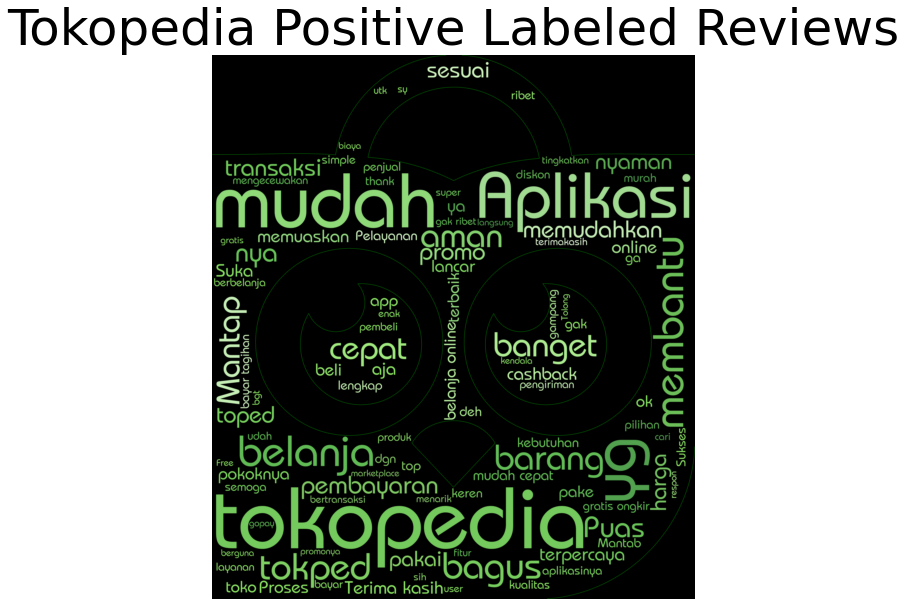

In [18]:
word_cloud(dfs_sentiment_positive,sentiment='Positive Labeled')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


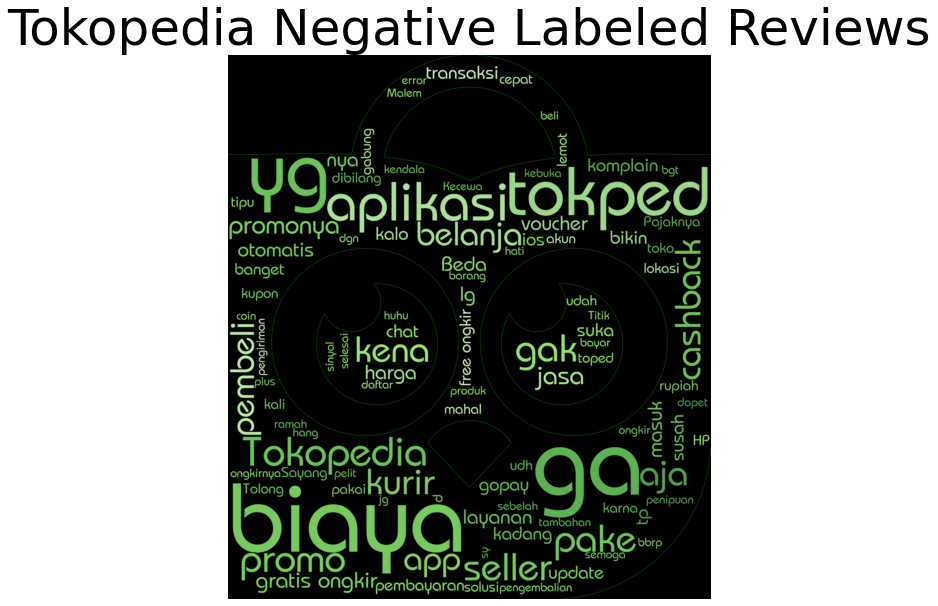

In [19]:
word_cloud(dfs_sentiment_negative,sentiment='Negative Labeled')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


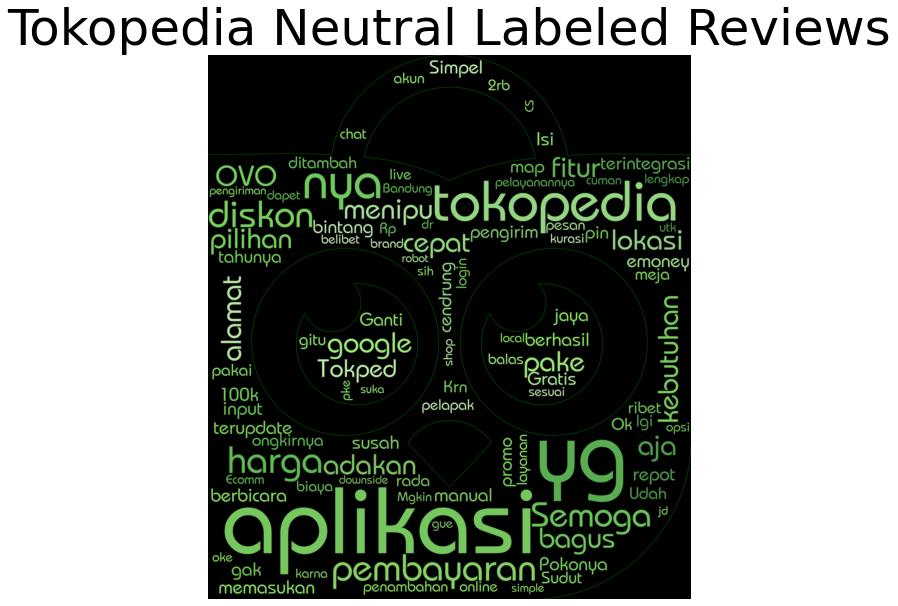

In [20]:
word_cloud(dfs_sentiment_neutral,sentiment='Neutral Labeled')